In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

## 饮料品牌

In [2]:
filename = 'drinkbrands.xlsx'
data = pd.read_excel(filename, header=None)
freq = data[0].value_counts()

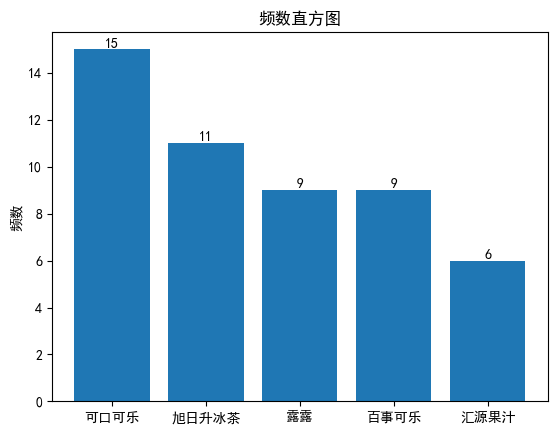

In [3]:
# 直方图

bars = plt.bar(freq.index, freq.values)
plt.ylabel('频数')
plt.title('频数直方图')

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, y, int(y), ha='center', va='bottom')

plt.show() 

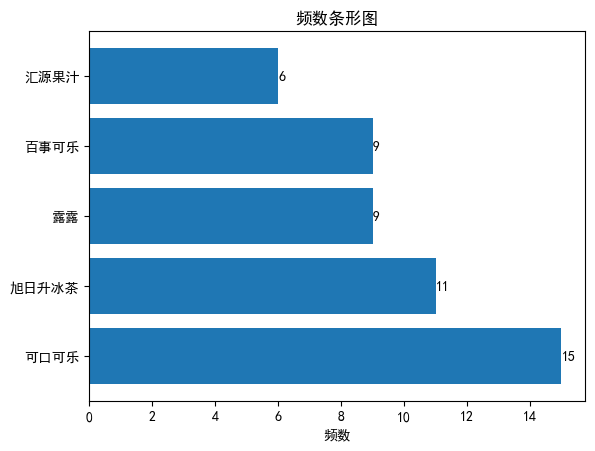

In [4]:
# 条形图
barhs = plt.barh(freq.index, freq.values)
plt.xlabel('频数')
plt.title('频数条形图')

for i, v in enumerate(freq.values):
    plt.text(v, i, v, ha='left', va='center')
    
plt.show()

Text(0.5, 1.0, '饼图')

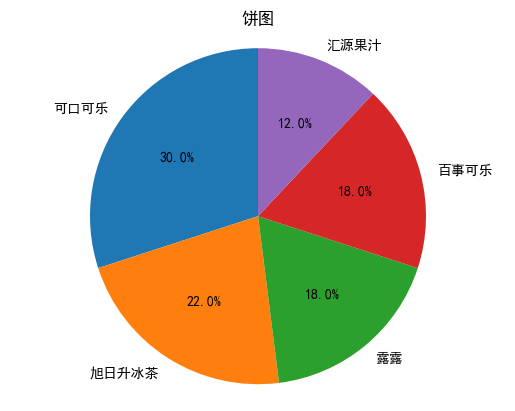

In [5]:
# 饼图
plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%', startangle=90, shadow=False)
plt.axis('equal')
plt.title('饼图')

## 定量数据

In [6]:
filename = 'ComputerSales.xls'
data = pd.read_excel(filename, header=None)
x = data.values.flatten().tolist()

bins: [140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240.]


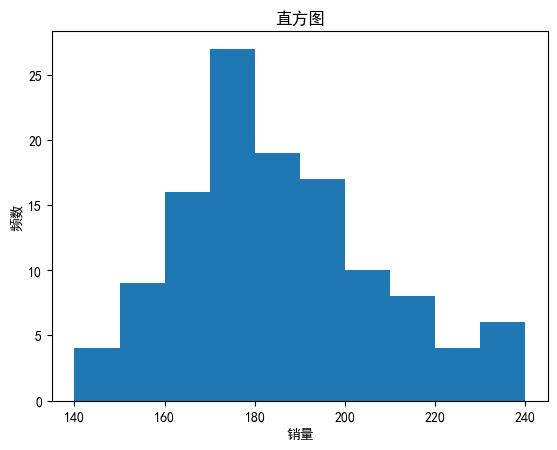

In [7]:
# 直方图
bins = np.linspace(140, 240, 11)

plt.hist(x, bins)
print('bins:', bins)
plt.xlabel('销量')
plt.ylabel('频数')
plt.title('直方图')

plt.show()

In [8]:
# 茎叶图
from itertools import groupby
print("22信计郑梓阳")
print()
for k, g in groupby(sorted(x), key=lambda x: int(x)//10):
    lst = map(str, [int(y)%10 for y in list(g)])
    print("%d | %s"%(k, ' '.join(lst)))

22信计郑梓阳

14 | 1 3 4 9
15 | 0 2 3 3 4 5 6 8 9
16 | 0 0 1 1 2 3 3 4 5 5 5 6 7 8 8 8
17 | 0 1 1 2 2 2 2 2 3 3 4 4 4 5 5 5 5 6 6 7 7 8 8 8 9 9 9
18 | 0 0 1 2 2 3 4 5 6 7 7 7 7 8 8 8 9 9 9
19 | 0 0 1 2 4 4 5 5 6 6 6 6 6 7 7 8 8
20 | 0 1 2 3 3 5 6 7 8 9
21 | 0 0 1 1 3 4 5 8
22 | 3 5 6 8
23 | 3 3 4 4 7 7


## 例1.3

In [9]:
from math import sqrt

# 均值，中位数，上四分位数，下四分位数，极差，四分位差，方差，标准差，偏度，峰度
def stats(x):
    n = len(x)
    xbar = np.mean(x) # 均值
    xmax = max(x)
    xmin = min(x)
    M = np.quantile(x, 0.5, interpolation='midpoint') # 中位数
    Q3 = np.quantile(x, 0.75, interpolation='higher') # 上四分位数
    Q1 = np.quantile(x, 0.25, interpolation='lower') # 下四分位数
    R = xmax - xmin # 极差
    R1 = Q3 - Q1 # 四分位差
    s2 = sum((x-np.array([xbar]*n))**2)/(n-1) # 方差
    s = sqrt(s2) # 标准差
    SK = (n*sum((x-np.array([xbar]*n))**3))/((n-1)*(n-2)*(s**3))# 偏度
    K = (n*(n+1)/((n-1)*(n-2)*(n-3)))*sum((x-np.array([xbar]*n))**4)/(s**4) - 3*(n-1)**2/((n-2)*(n-3))#峰度
    U = 𝑄3 + 1.5*𝑅1 # 上截断点
    D = Q1 - 1.5*R1
    return [xbar, M, Q3, Q1, s2, s, R, R1, SK, K, U, D]

In [10]:
filename = 'eg1d3data.xls'
data = pd.read_excel(filename, header=None)
stats_data = [[0 for i in range(12)] for j in range(4)]
for i in [1, 2, 3, 4]:
    D = data[i].values
    stats_data[i-1] = stats(D)
stats_data = list(zip(*stats_data)) # 注意其中二维列表里面变成了元组
columns = ['国民生产总值', '第一产业', '第二产业', '第三产业']
index = ['xbar', 'M', 'Q3', 'Q1', 's2', 's', 'R', 'R1', 'SK', 'K', '上截断点', '下截断点']
df = pd.DataFrame(stats_data, columns=columns, index=index)
df = df.applymap(lambda x: '%.2f'%x)
df.loc['s2'] =  df.loc['s2'].apply(lambda x : '{:.4e}'.format(float(x)))
df

C:\Users\86158\AppData\Local\Temp\ipykernel_5920\1079793455.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  stats_data[i-1] = stats(D)
C:\Users\86158\AppData\Local\Temp\ipykernel_5920\1079793455.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: '%.2f'%x)


,国民生产总值,第一产业,第二产业,第三产业
xbar,16764.45,3486.65,8030.58,5247.22
M,3099.60,969.05,1439.80,703.20
Q3,16909.20,4228.00,7278.00,5403.20
Q1,1457.00,559.00,602.20,456.30
s2,7.2620e+08,2.1975e+07,1.8308e+08,7.7392e+07
s,26948.17,4687.75,13530.61,8797.29
R,95254.30,14269.20,48927.30,32060.00
R1,15452.20,3669.00,6675.80,4946.90
SK,1.87,1.62,1.94,1.92
K,2.18,1.17,2.48,2.50


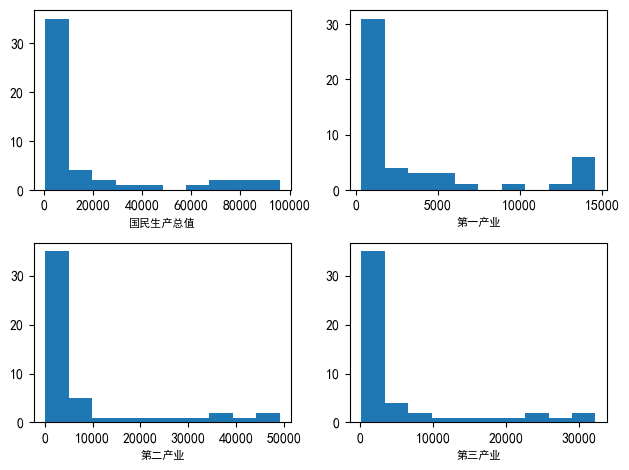

In [11]:
# 画图
fig, ax = plt.subplots(2, 2)

content = ['国民生产总值', '第一产业', '第二产业', '第三产业']
for k in range(1, 5):
    x = data[k].values.tolist()
    i = (k-1) // 2 
    j = (k-1) % 2
    ax[i, j].hist(x, bins=10)
    ax[i, j].set_xlabel(content[k-1], fontsize=8)
plt.tight_layout()
plt.show()

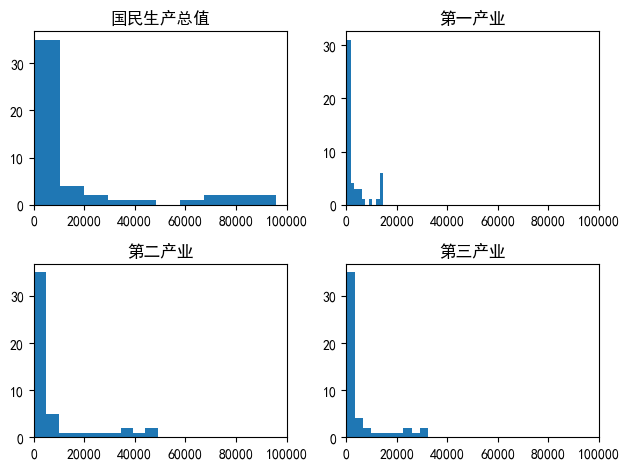

In [12]:
# 画图
fig, ax = plt.subplots(2, 2)
content = ['国民生产总值', '第一产业', '第二产业', '第三产业']
for k in range(1, 5):
    x = data[k].values.tolist()
    i = (k-1) // 2 
    j = (k-1) % 2
    ax[i, j].hist(x, bins=10)
    ax[i, j].set_title(content[k-1])
    ax[i, j].set_xlim(0, 100000)
plt.tight_layout()
plt.show()

In [13]:
# 异常值：大于上截断点或小于下截断

# 上、下截断点，但由上表可知，下截断点不切实际，舍弃掉，因此判断异常值只需要看是否大于上截断点
up =  stats_data[-2]
print(up)

Data = list(zip(*data.values.tolist()))

# 异常值列表
ab_value = [[x for x in Data[i] if x>up[i-1]] for i in range(1, 5)]
ab_value

(40087.5, 9731.5, 17291.7, 12823.55)


[[46759.4, 58478.1, 67884.6, 74462.6, 78345.2, 81910.9, 89403.6, 95933.3],
 [11993.0, 13844.2, 14211.2, 14552.4, 14457.2, 14212.0, 14609.9],
 [22372.2, 28537.9, 33612.9, 37222.7, 38619.3, 40417.9, 45487.8, 49069.1],
 [14930.0, 17947.2, 20427.5, 23028.7, 25173.5, 27035.8, 29703.8, 32254.3]]

## 例1.4

In [14]:
from scipy.stats import norm

filename = 'SerumProteinComponents.xls'
data = pd.read_excel(filename, header= None)
data = data.values.flatten().tolist()

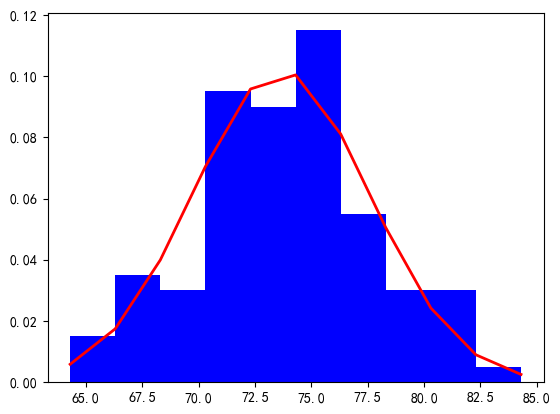

In [15]:
# 直方图、拟合正态分布曲线

# 直方图
# n是频数，x是界

n, x, fig = plt.hist(data, bins=10, density=True, color='blue')
#注:density=True用于使直方图的面积为1（这样直方图表示的就是概率密度了）

# 拟合正态曲线
miu, s = norm.fit(data)
xmin, xmax = plt.xlim()
p = norm.pdf(x, miu, s)
plt.plot(x, p, 'r', linewidth=2)

plt.show()




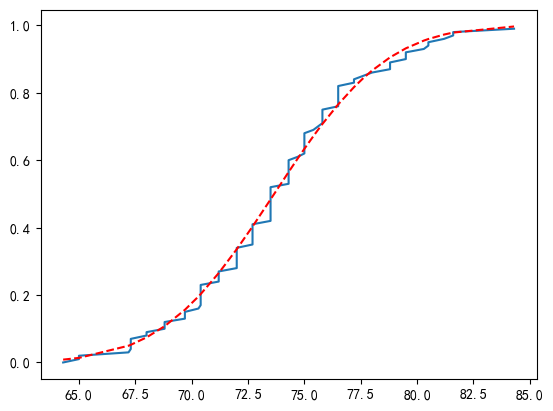

In [16]:
# 经验分布函数
x = sorted(data)
n = len(x)
X = []
Y = []
y = []
X.append(x[0])
Y.append(0)
y.append(0)
for i in range(1,n):
    X.append(x[i-1])
    Y.append((i-1)/n)
    
    Y.append(i/n)
    X.append(x[i])

    y.append(i/n)
plt.plot(X,Y)

# 拟合正态分布曲线
miu, s = norm.fit(x)
p = norm.cdf(x, miu, s)
plt.plot(x, p,'r--')

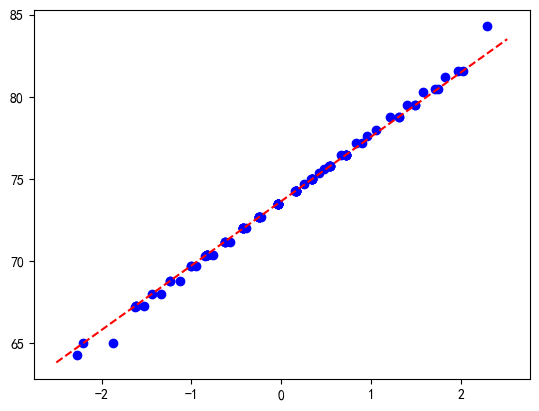

In [17]:
#  正态QQ图
y = sorted(data)
x = []
n = len(data)
# 期望与标准差
miu, s = np.mean(data), np.std(data)
for i in range(n):
    location = (i+1-0.375)/(n+0.25)
    # 标准化：
    Q = (np.quantile(data, location)-miu)/s 
    x .append(Q)
plt.scatter(x, y, color='blue')

# 是否近似正态分布
x1, x2 = plt.xlim()
y1, y2 = x1*s+miu, x2*s+miu
plt.plot([x1,x2], [y1,y2], 'r--')
plt.show()

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

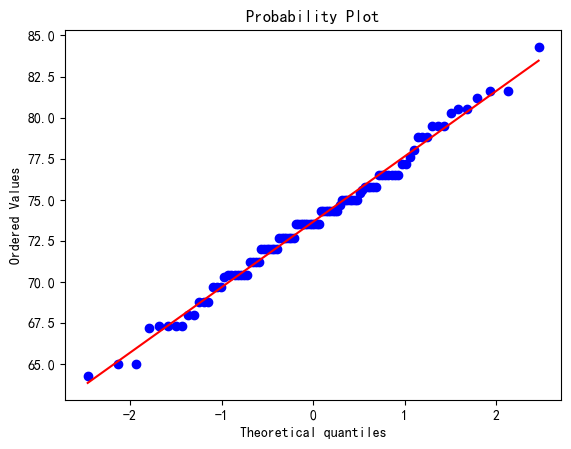

In [18]:
import scipy.stats as stats
stats.probplot(y, plot=plt)

## 课件例1.7

In [19]:
from scipy import stats
from scipy.stats import norm

In [20]:
# 卡方检验(调用chisquare方法)
filename = 'SerumProteinComponents.xls'
data = pd.read_excel(filename, header=None)
data = data.values.flatten().tolist()
bins = np.linspace(min(data), max(data), 10).tolist()
freq, edge = np.histogram(data, bins)

# 期望的频数（理论频数）
n = len(data)
xbar = np.mean(data)
s = np.std(data)
np_i =  np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    pi = round(norm.cdf(bins[i], xbar, s), 4)
    pi1 = round(norm.cdf(bins[i+1], xbar, s), 4)
    np_i[i] = round((pi1-pi)*n) + 0.1111111

print(sum(np_i))
print(sum(freq))

stats.chisquare(f_obs=freq, f_exp=np_i)

99.9999999
100


Power_divergenceResult(statistic=3.9418503451853675, pvalue=0.8623314239247768)

- chisquare()的使用
> ```python
> scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)  
> + f_obs是每个类别观察到的频率  
> + f_exp是每个类别的期望频率，默认情况下认为相同
> + ddof是自由度  
- 使用chisquare方法进行检验的时候值得注意的是：  
> + 观察到的频率总和和预期频率总和必须相同才能正常运行（有1×$10^{-8}$容差范围）

In [21]:
filename = 'SerumProteinComponents.xls'
data = pd.read_excel(filename, header=None)
data = data.values.flatten().tolist()
bins = np.linspace(min(data), max(data), 10).tolist()
freq, edge = np.histogram(data, bins)

# 期望的频数（理论频数）
n = len(data)
xbar = np.mean(data)
s = np.std(data)
np_i =  np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    pi = norm.cdf(bins[i], xbar, s)
    pi1 = norm.cdf(bins[i+1], xbar, s)
    np_i[i] = (pi1-pi)*n

# 卡方
chi = sum((freq - np_i)**2/np_i)

dof = len(bins) -1 -2

p = 1 - stats.chi2.cdf(chi, dof, 0, 1)

print(chi, p)

3.8431927853271906 0.7976511029241259


In [22]:
# 正态性W检验
stats.shapiro(freq)

ShapiroResult(statistic=0.9239875105600033, pvalue=0.4262718961767344)

In [23]:
# anderson-Darling
stats.anderson(freq, dist='norm')

AndersonResult(statistic=0.3433429213579178, critical_values=array([0.507, 0.578, 0.693, 0.808, 0.961]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.11111111111111, scale=8.608781046763305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

- scipy.stats.anderson()  
> ```python
> scipy.stats.anderson(x, dist='xxx')  
> > - x是待检测的数据  
> > - dist是选择做哪种分布的检验  
> > - 输出的变量有三个，一为统计数,二为评判值，三为显著性水平

In [24]:
# kstest
stats.kstest(freq, 'norm')

KstestResult(statistic=0.8875389908572588, pvalue=5.755032516080534e-09, statistic_location=3, statistic_sign=-1)

- scipy.stats.kstest()  
> ```python
> scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two_sided', mode='approx', **kwds)  
> > - rvs是待检测的数据  
> > - cdf是选择做哪种分布的检验  
> > - alternative:默认为双尾检验，可以设置为less或greater作单尾检验

## 例1.8

In [25]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import weibull_min

In [26]:
filename = 'eg1d5data.xls'
data = pd.read_excel(filename, header=None)
data = data.values.flatten().tolist()
print(data)

[25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75, 78, 79, 81, 83, 84, 84, 84, 85, 86, 86, 86, 87, 89, 89, 89, 90, 91, 91, 92, 100]


In [27]:
stats.shapiro(data)

ShapiroResult(statistic=0.8632868606897313, pvalue=0.0009852518368111992)

In [28]:
# 数据的偏度
SK = stats.skew(data)
SK

-1.3270015492981377

In [29]:
# 卡方检验
# 实际频数
bins = np.linspace(min(data), max(data), 10).tolist()
freq, edge = np.histogram(data, bins)

# 计算期望频数
n = len(data)
c, miu, s = weibull_min.fit(data, floc=0)

np_i = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    pi = weibull_min.cdf(bins[i], c, loc=miu, scale=s)
    pi1 = weibull_min.cdf(bins[i+1], c, loc=miu, scale=s)
    np_i[i] = n * (pi1-pi)
print(np_i)

[0.07745064 0.29047651 0.8304442  1.93629116 3.75507343 5.9530407
 7.31591261 6.35814718 3.41489542]


In [30]:
# 根据公式计算卡方统计量
chi2 = 0
for i in range(len(bins)-1):
    chi2 = chi2 + (freq[i] - np_i[i])**2 / np_i[i]
print('卡方统计量为', chi2)

# 根据公式计算卡方检验的p值
l = len(bins)-1
k = 2
dof = l - k -1
p = 1- stats.chi2.cdf(chi2, dof, loc=0, scale=1)
print("卡方检验的p值为", p)

卡方统计量为 25.351278632971486
卡方检验的p值为 0.0002939145108188379


- 可能是异常值的存在影响了卡方检验

In [31]:
filename = 'eg1d5data.xls'
data = pd.read_excel(filename, header=None)
data = data.values.flatten().tolist()

In [32]:
# 去除异常值
Q3 = np.quantile(data, 0.75, interpolation='higher') # 上四分位数
Q1 = np.quantile(data, 0.25, interpolation='lower') # 下四分位数
R1 = Q3 - Q1 # 四分位极差
Data = [i for i in data if i > Q1-1.5*R1 and i < Q3+1.5*R1]

# 卡方检验
# 实际频数
bins = np.linspace(min(Data), max(Data), 10).tolist()
freq, edge = np.histogram(data, bins)

# 计算期望频数
n = len(Data)
c, miu, s = weibull_min.fit(Data, floc=0)

np_i = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    pi = weibull_min.cdf(bins[i], c, loc=miu, scale=s)
    pi1 = weibull_min.cdf(bins[i+1], c, loc=miu, scale=s)
    np_i[i] = n * (pi1-pi)
print(np_i)



# 根据公式计算卡方统计量
chi2 = 0
for i in range(len(bins)-1):
    chi2 = chi2 + (freq[i] - np_i[i])**2 / np_i[i]
print('卡方统计量为', chi2)

# 根据公式计算卡方检验的p值
l = len(bins)-1
k = 2
dof = l - k -1
p = 1- stats.chi2.cdf(chi2, dof, loc=0, scale=1)
print("卡方检验的p值为", p)

[0.40773709 0.88603545 1.726966   3.00813187 4.59263095 5.91446841
 6.03956951 4.46629745 2.110019  ]
卡方统计量为 13.723260723512794
卡方检验的p值为 0.03288498326616973
